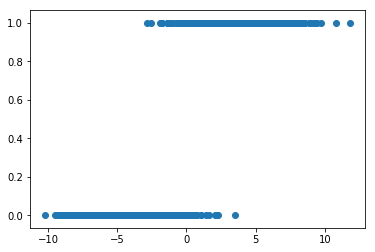

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

In [3]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

0 0.69314593
1 0.6536908
2 0.61817896
3 0.58618796
4 0.55732524
5 0.53123444
6 0.5075948
7 0.48612216
8 0.4665658
9 0.44870618
10 0.43235064
11 0.4173319
12 0.40350324
13 0.3907372
14 0.37892205
15 0.3679598
16 0.3577652
17 0.3482631
18 0.33938715
19 0.3310791
20 0.32328728
21 0.31596577
22 0.30907366
23 0.3025749
24 0.29643708
25 0.290631
26 0.2851305
27 0.27991235
28 0.27495506
29 0.27023965
30 0.26574883
31 0.26146668
32 0.25737897
33 0.25347263
34 0.24973565
35 0.24615732
36 0.24272749
37 0.23943698
38 0.23627739
39 0.2332409
40 0.23032047
41 0.22750929
42 0.22480124
43 0.2221908
44 0.21967255
45 0.21724169
46 0.21489352
47 0.21262397
48 0.21042886
49 0.20830478
50 0.20624807
51 0.20425558
52 0.2023242
53 0.20045114
54 0.19863373
55 0.19686957
56 0.19515608
57 0.19349116
58 0.19187282
59 0.19029897
60 0.18876772
61 0.18727744
62 0.18582642
63 0.18441297
64 0.18303575
65 0.18169335
66 0.18038431
67 0.17910743
68 0.17786157
69 0.17664555
70 0.17545812
71 0.17429845
72 0.17316556
73 0

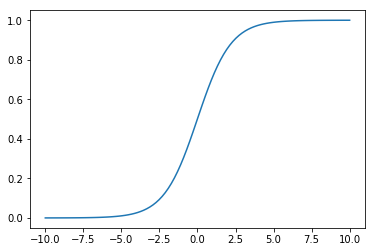

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show()

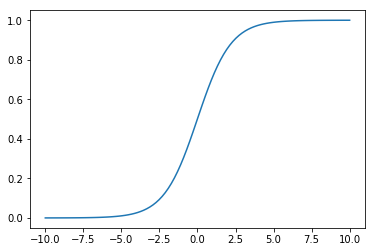

In [8]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show()